# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [11]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


data=pd.read_csv('stroke_dataset.csv')

In [12]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
data.shape

(5110, 12)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
#dropping NULL bmi values
data1=data.dropna()

In [16]:
#data without NULL values
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

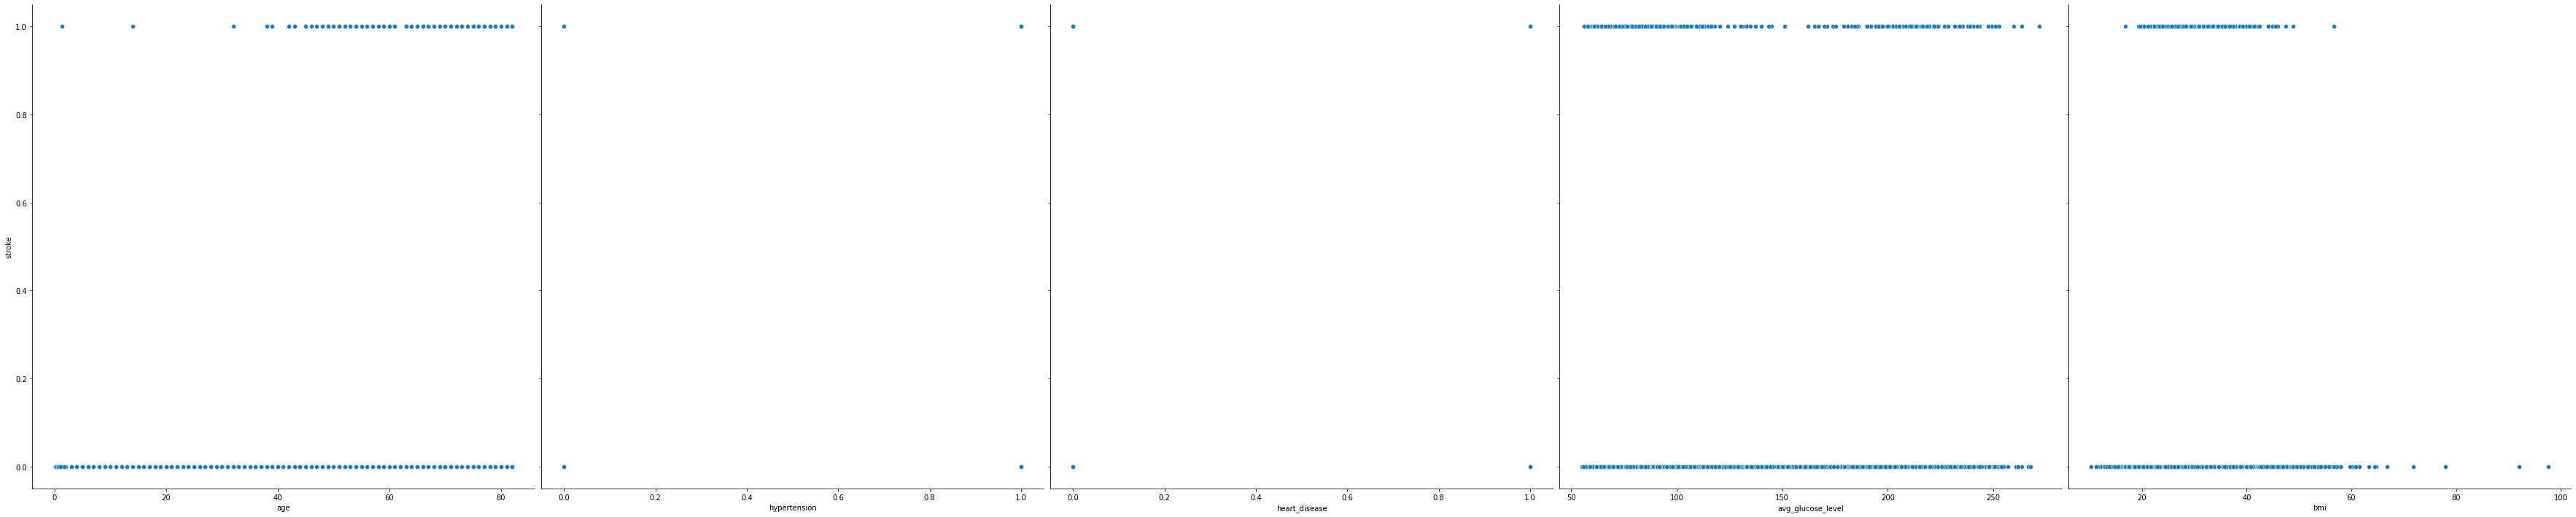

In [17]:
sns.pairplot(data, x_vars=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'],
                    y_vars='stroke', size=10, aspect=1, kind='scatter')
plt.show()
#pairplot is not ideal for the data

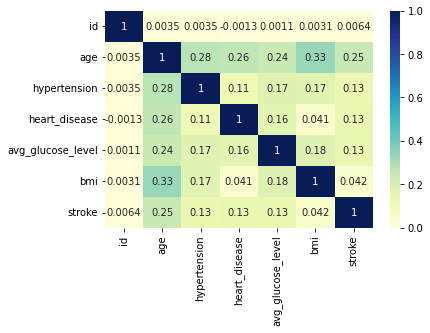

In [18]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

#age is most correlated with the data

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [19]:
#I will use age and bmi

x=data1['age']
y=data1['bmi']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [21]:
x_train

3315     2.0
1518    32.0
1569    54.0
2099    55.0
2829    43.0
        ... 
4332     2.0
1995    71.0
392     39.0
96      70.0
4104    62.0
Name: age, Length: 3436, dtype: float64

In [22]:
y_train

3315    20.4
1518    22.8
1569    34.7
2099    34.7
2829    28.4
        ... 
4332    17.6
1995    33.3
392     26.4
96      24.4
4104    35.8
Name: bmi, Length: 3436, dtype: float64

In [23]:
import statsmodels.api as sm

x_train_sm=sm.add_constant(x_train)

In [24]:
lr=sm.OLS(y_train, x_train_sm).fit()
lr.params

const    23.902476
age       0.116810
dtype: float64

In [25]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     419.5
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           4.59e-88
Time:                        16:58:00   Log-Likelihood:                -11788.
No. Observations:                3436   AIC:                         2.358e+04
Df Residuals:                    3434   BIC:                         2.359e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9025      0.276     86.525      0.000      23.361      24.444
age            0.1168      0.006     20.483      0.000       0.106       0.128
==============================================================================
Omnibus:                     1073.612   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4684.283
Skew:                           1.459   Prob(JB):                         0.00
Kurtosis:                       7.920   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

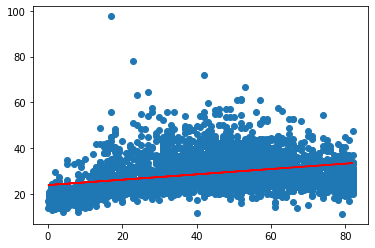

In [26]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 23.9025 + 0.1168*x_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [27]:
y_train_pred=lr.predict(x_train_sm)
res=(y_train - y_train_pred)

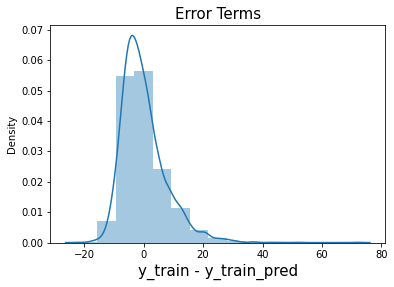

In [28]:
fig=plt.figure()
sns.distplot(res, bins =15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

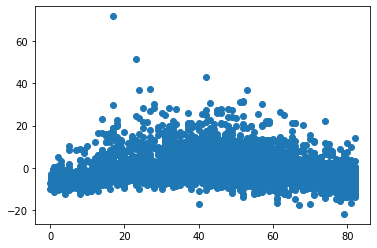

In [29]:
plt.scatter(x_train,res)
plt.show()

In [31]:
x_test_sm=sm.add_constant(x_test)
y_test_pred=lr.predict(x_test_sm)
y_test_pred

1062    33.247247
4999    26.005049
976     30.794244
3886    29.158909
1875    33.247247
          ...    
349     29.509338
2577    32.896818
2083    26.705907
5086    29.859767
4055    31.845531
Length: 1473, dtype: float64

In [32]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.1166784046892877

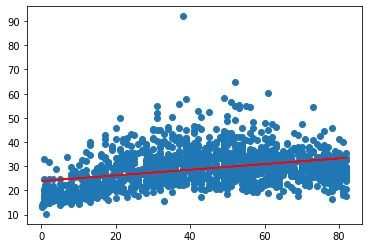

In [33]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
x_train_lm, x_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
x_train_lm.shape

x_train_lm=x_train_lm.values.reshape(-1,1)
x_test_lm=x_test_lm.values.reshape(-1,1)

print(x_train_lm.shape)
print(x_test_lm.shape)

(3436, 1)
(1473, 1)


In [36]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(x_train_lm, y_train_lm)

LinearRegression()

In [37]:
print('Intercept :', lm.intercept_)
print('Slope :', lm.coef_)

Intercept : 23.902475634182146
Slope : [0.11680964]


In [41]:
y_train_pred=lm.predict(x_train_lm)
y_test_pred=lm.predict(x_test_lm)

print('R2 train_data :',r2_score(y_train, y_train_pred))
print('R2 test_data :',r2_score(y_test, y_test_pred))

R2 train_data : 0.10887225267357103
R2 test_data : 0.1166784046892877


## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.109
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? No, the R2 of the test and train data was 6.8% which is not within limits of 5%.
3. Was your plot of the error terms a bell curve? The error terms plot was a bell curve skewed to the right.